In [124]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

In [125]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

results = loadmat('yalefaces.mat')

X=results['X']
print(X.shape)

Mounted at /content/drive
(1024, 2414)


(1024, 100)


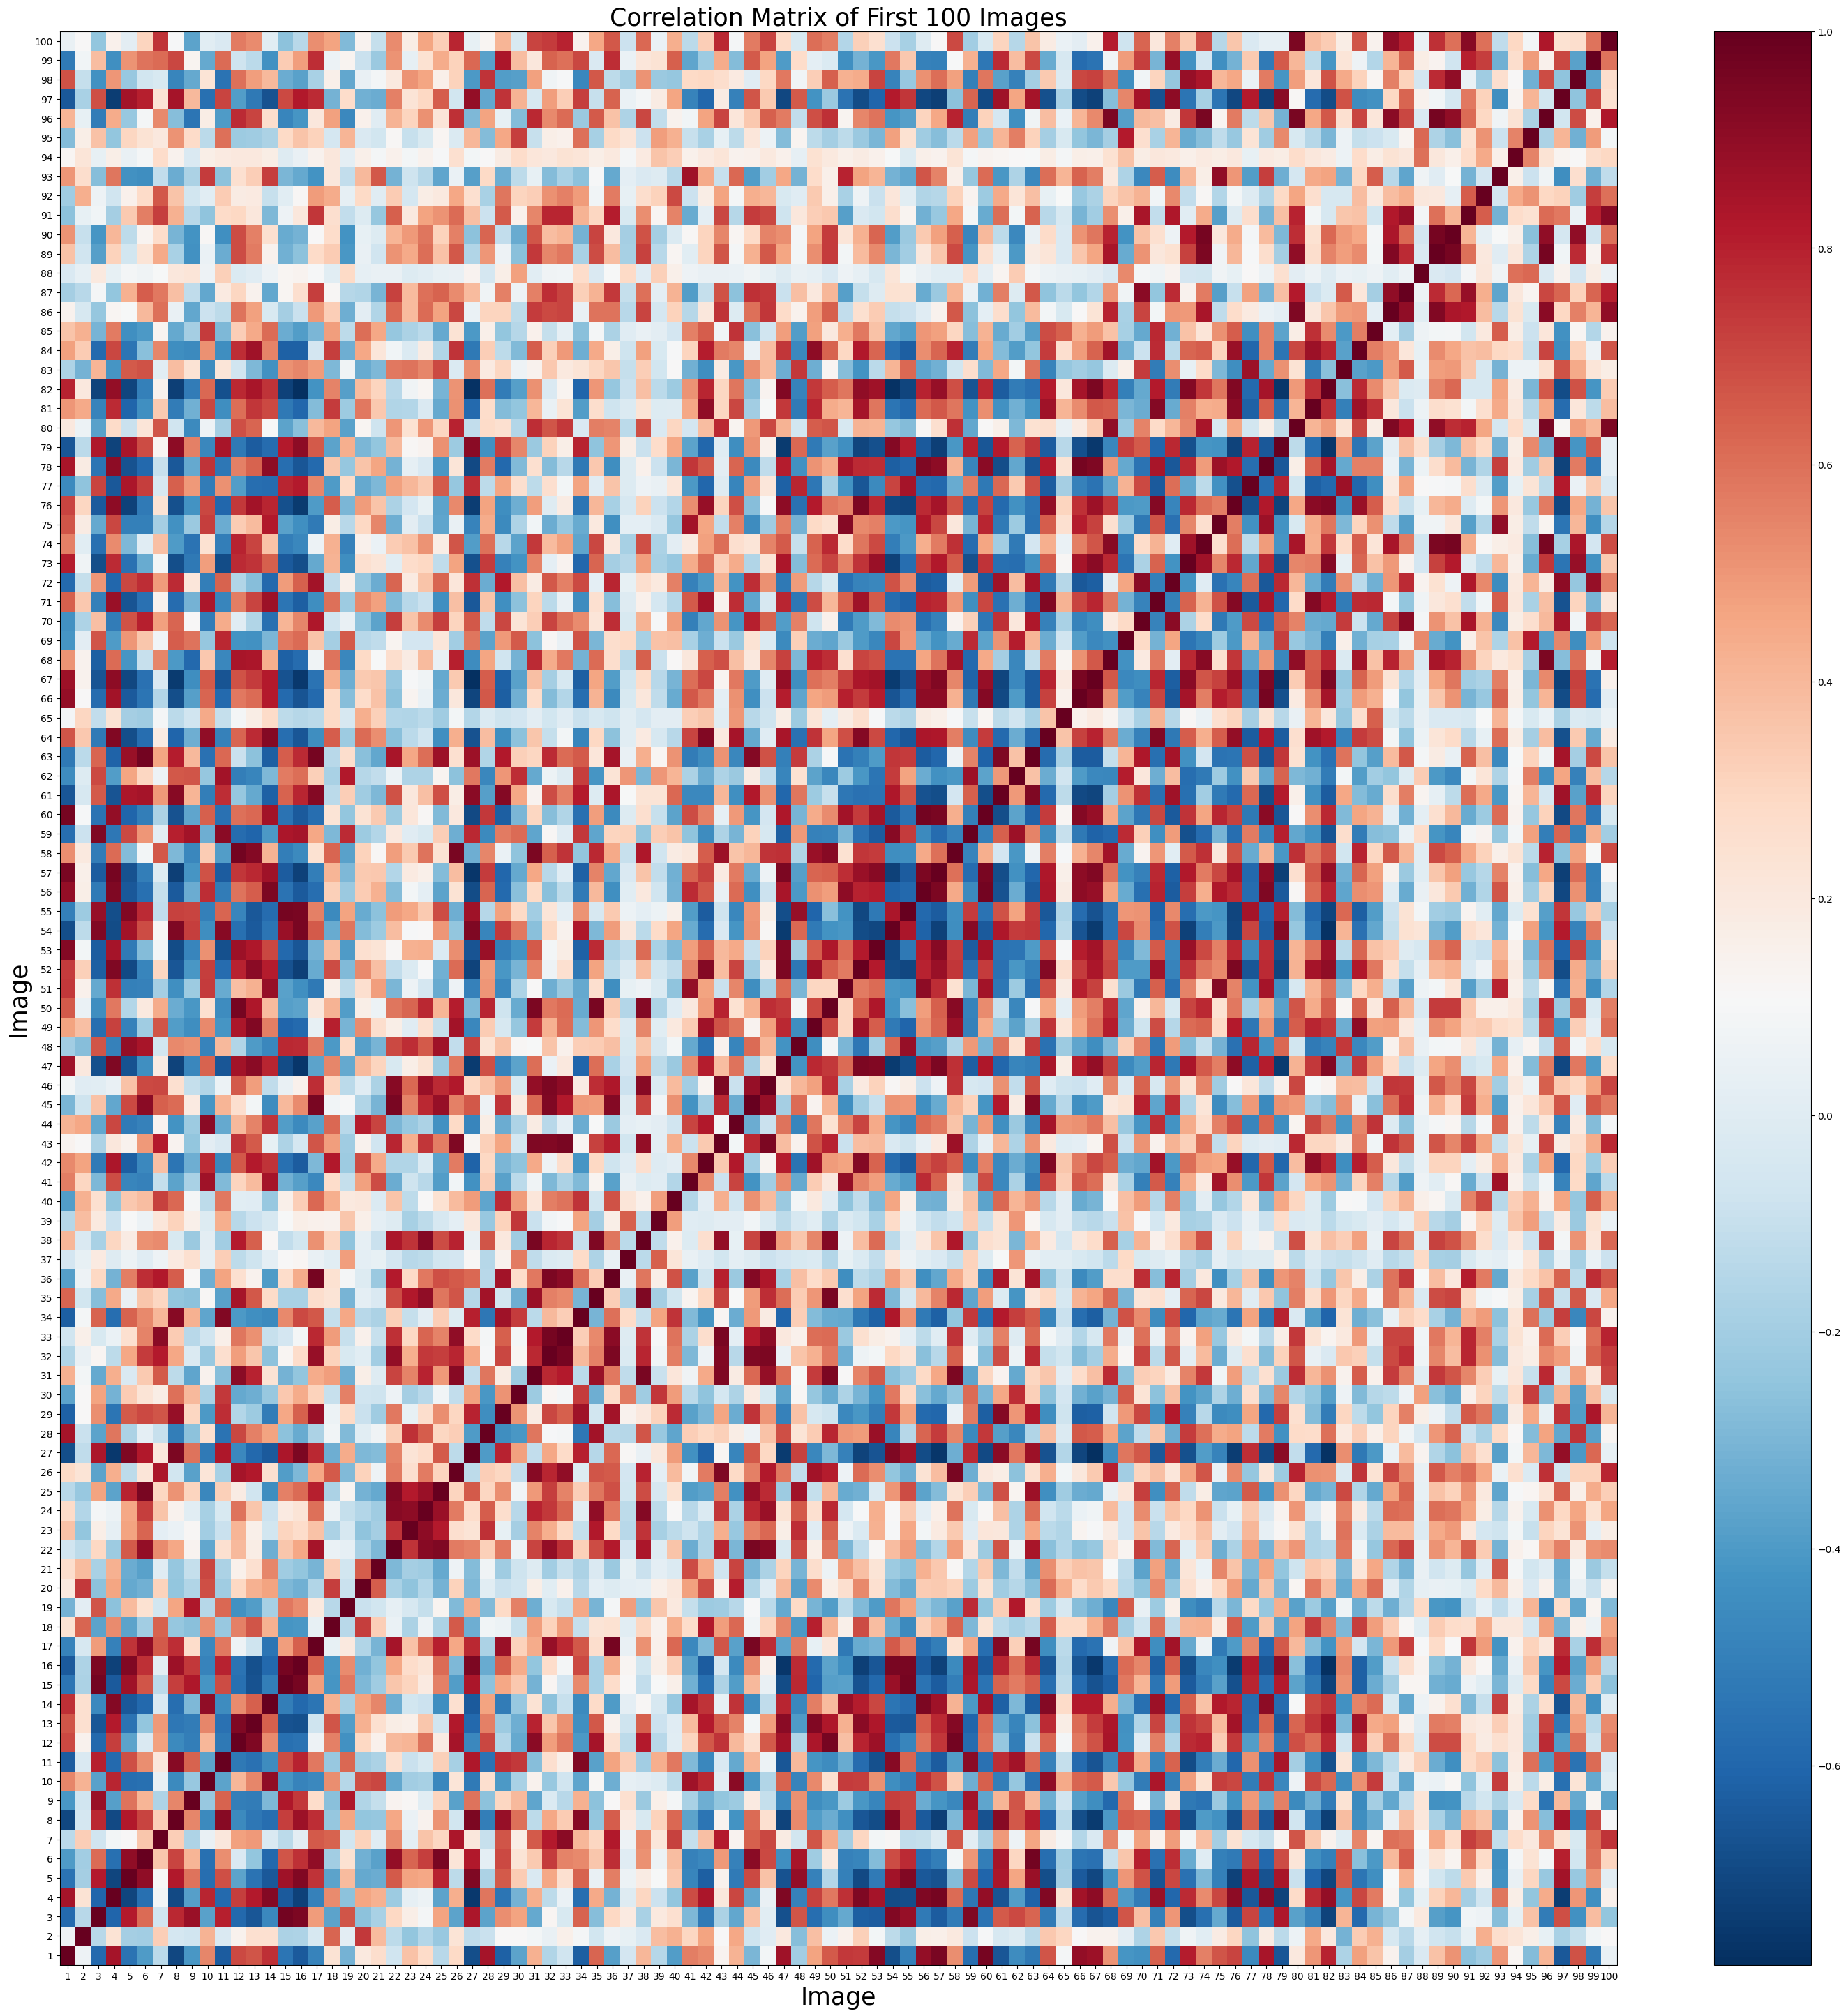

In [155]:
m = 100
Xm = X[:, 0:m]
C = np.corrcoef(Xm.T)
print(Xm.shape)

fig, ax = plt.subplots(figsize=(36, 36))
im = ax.pcolor(C, cmap='RdBu_r')
ax.set_xticks(np.arange(m)+0.5, minor=False)
ax.set_yticks(np.arange(m)+0.5, minor=False)
ax.set_xticklabels(np.arange(1, m+1), minor=False)
ax.set_yticklabels(np.arange(1, m+1), minor=False)
plt.xlabel('Image', fontsize=25)
plt.ylabel('Image', fontsize=25)
plt.title(f'Correlation Matrix of First {m} Images', fontsize=25)
plt.colorbar(im)
plt.show()

Max Correlation: 0.9710984631450814
Most highly correlated pair: 6 and 63

Min Correlation: -0.7840280171025156
Most highly uncorrelated pair: 16 and 82


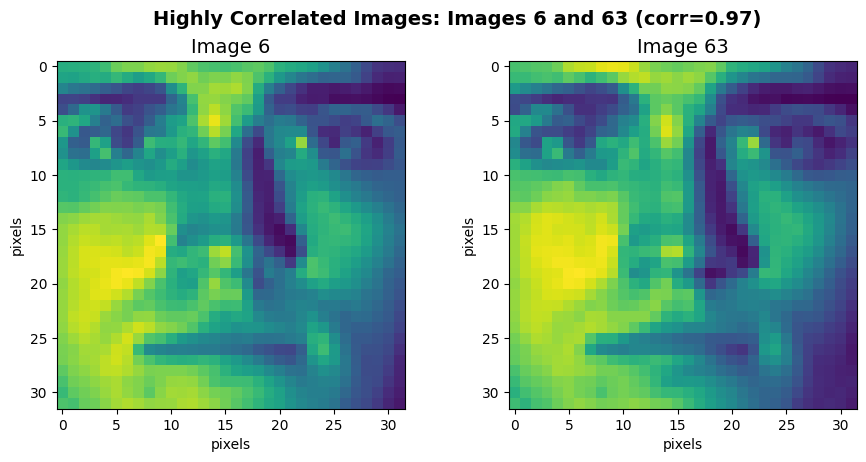

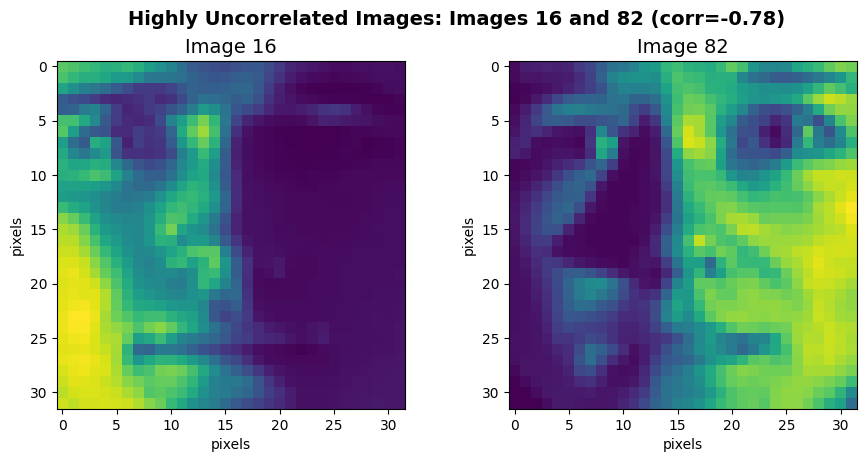

In [143]:
max_corr = np.max((C - np.eye(m)))
print('Max Correlation:', max_corr)
max_indices = np.where((C - np.eye(m)) == max_corr)
print("Most highly correlated pair:", max_indices[0][0] + 1, "and", max_indices[1][0] + 1)
print()

min_corr = np.min((C - np.eye(m)))
print('Min Correlation:', min_corr)
min_indices = np.where((C - np.eye(m)) == min_corr)
print("Most highly uncorrelated pair:", min_indices[0][0] + 1, "and", min_indices[1][0] + 1)

# First figure
fig1 = plt.figure(figsize=(10, 10))
fig1.suptitle(f'Highly Correlated Images: Images {max_indices[0][0]+1} and {max_indices[1][0]+1} (corr={max_corr:.2f})', fontsize=14, fontweight='bold', y=0.7)

ax1 = fig1.add_subplot(1, 2, 1)
ax1.imshow(X[:, max_indices[0][0]].reshape((32, 32)))
ax1.set_title(f'Image {max_indices[0][0]+1}', fontsize=14)
ax1.set_xlabel('pixels')
ax1.set_ylabel('pixels')

ax2 = fig1.add_subplot(1, 2, 2)
ax2.imshow(X[:, max_indices[0][1]].reshape((32, 32)))
ax2.set_title(f'Image {max_indices[0][1]+1}', fontsize=14)
ax2.set_xlabel('pixels')
ax2.set_ylabel('pixels')

fig1.subplots_adjust(wspace=0.3, hspace=0.3, top=0.85, bottom=0.1, left=0.1, right=0.9)

# Second figure
fig2 = plt.figure(figsize=(10, 10))
fig2.suptitle(f'Highly Uncorrelated Images: Images {min_indices[0][0]+1} and {min_indices[1][0]+1} (corr={min_corr:.2f})', fontsize=14, fontweight='bold', y=0.7)

ax3 = fig2.add_subplot(1, 2, 1)
ax3.imshow(X[:, min_indices[0][0]].reshape((32, 32)))
ax3.set_title(f'Image {min_indices[0][0]+1}', fontsize=14)
ax3.set_xlabel('pixels')
ax3.set_ylabel('pixels')

ax4 = fig2.add_subplot(1, 2, 2)
ax4.imshow(X[:, min_indices[0][1]].reshape((32, 32)))
ax4.set_title(f'Image {min_indices[0][1]+1}', fontsize=14)
ax4.set_xlabel('pixels')
ax4.set_ylabel('pixels')

fig2.subplots_adjust(wspace=0.3, hspace=0.3, top=0.85, bottom=0.1, left=0.1, right=0.9)

plt.show()


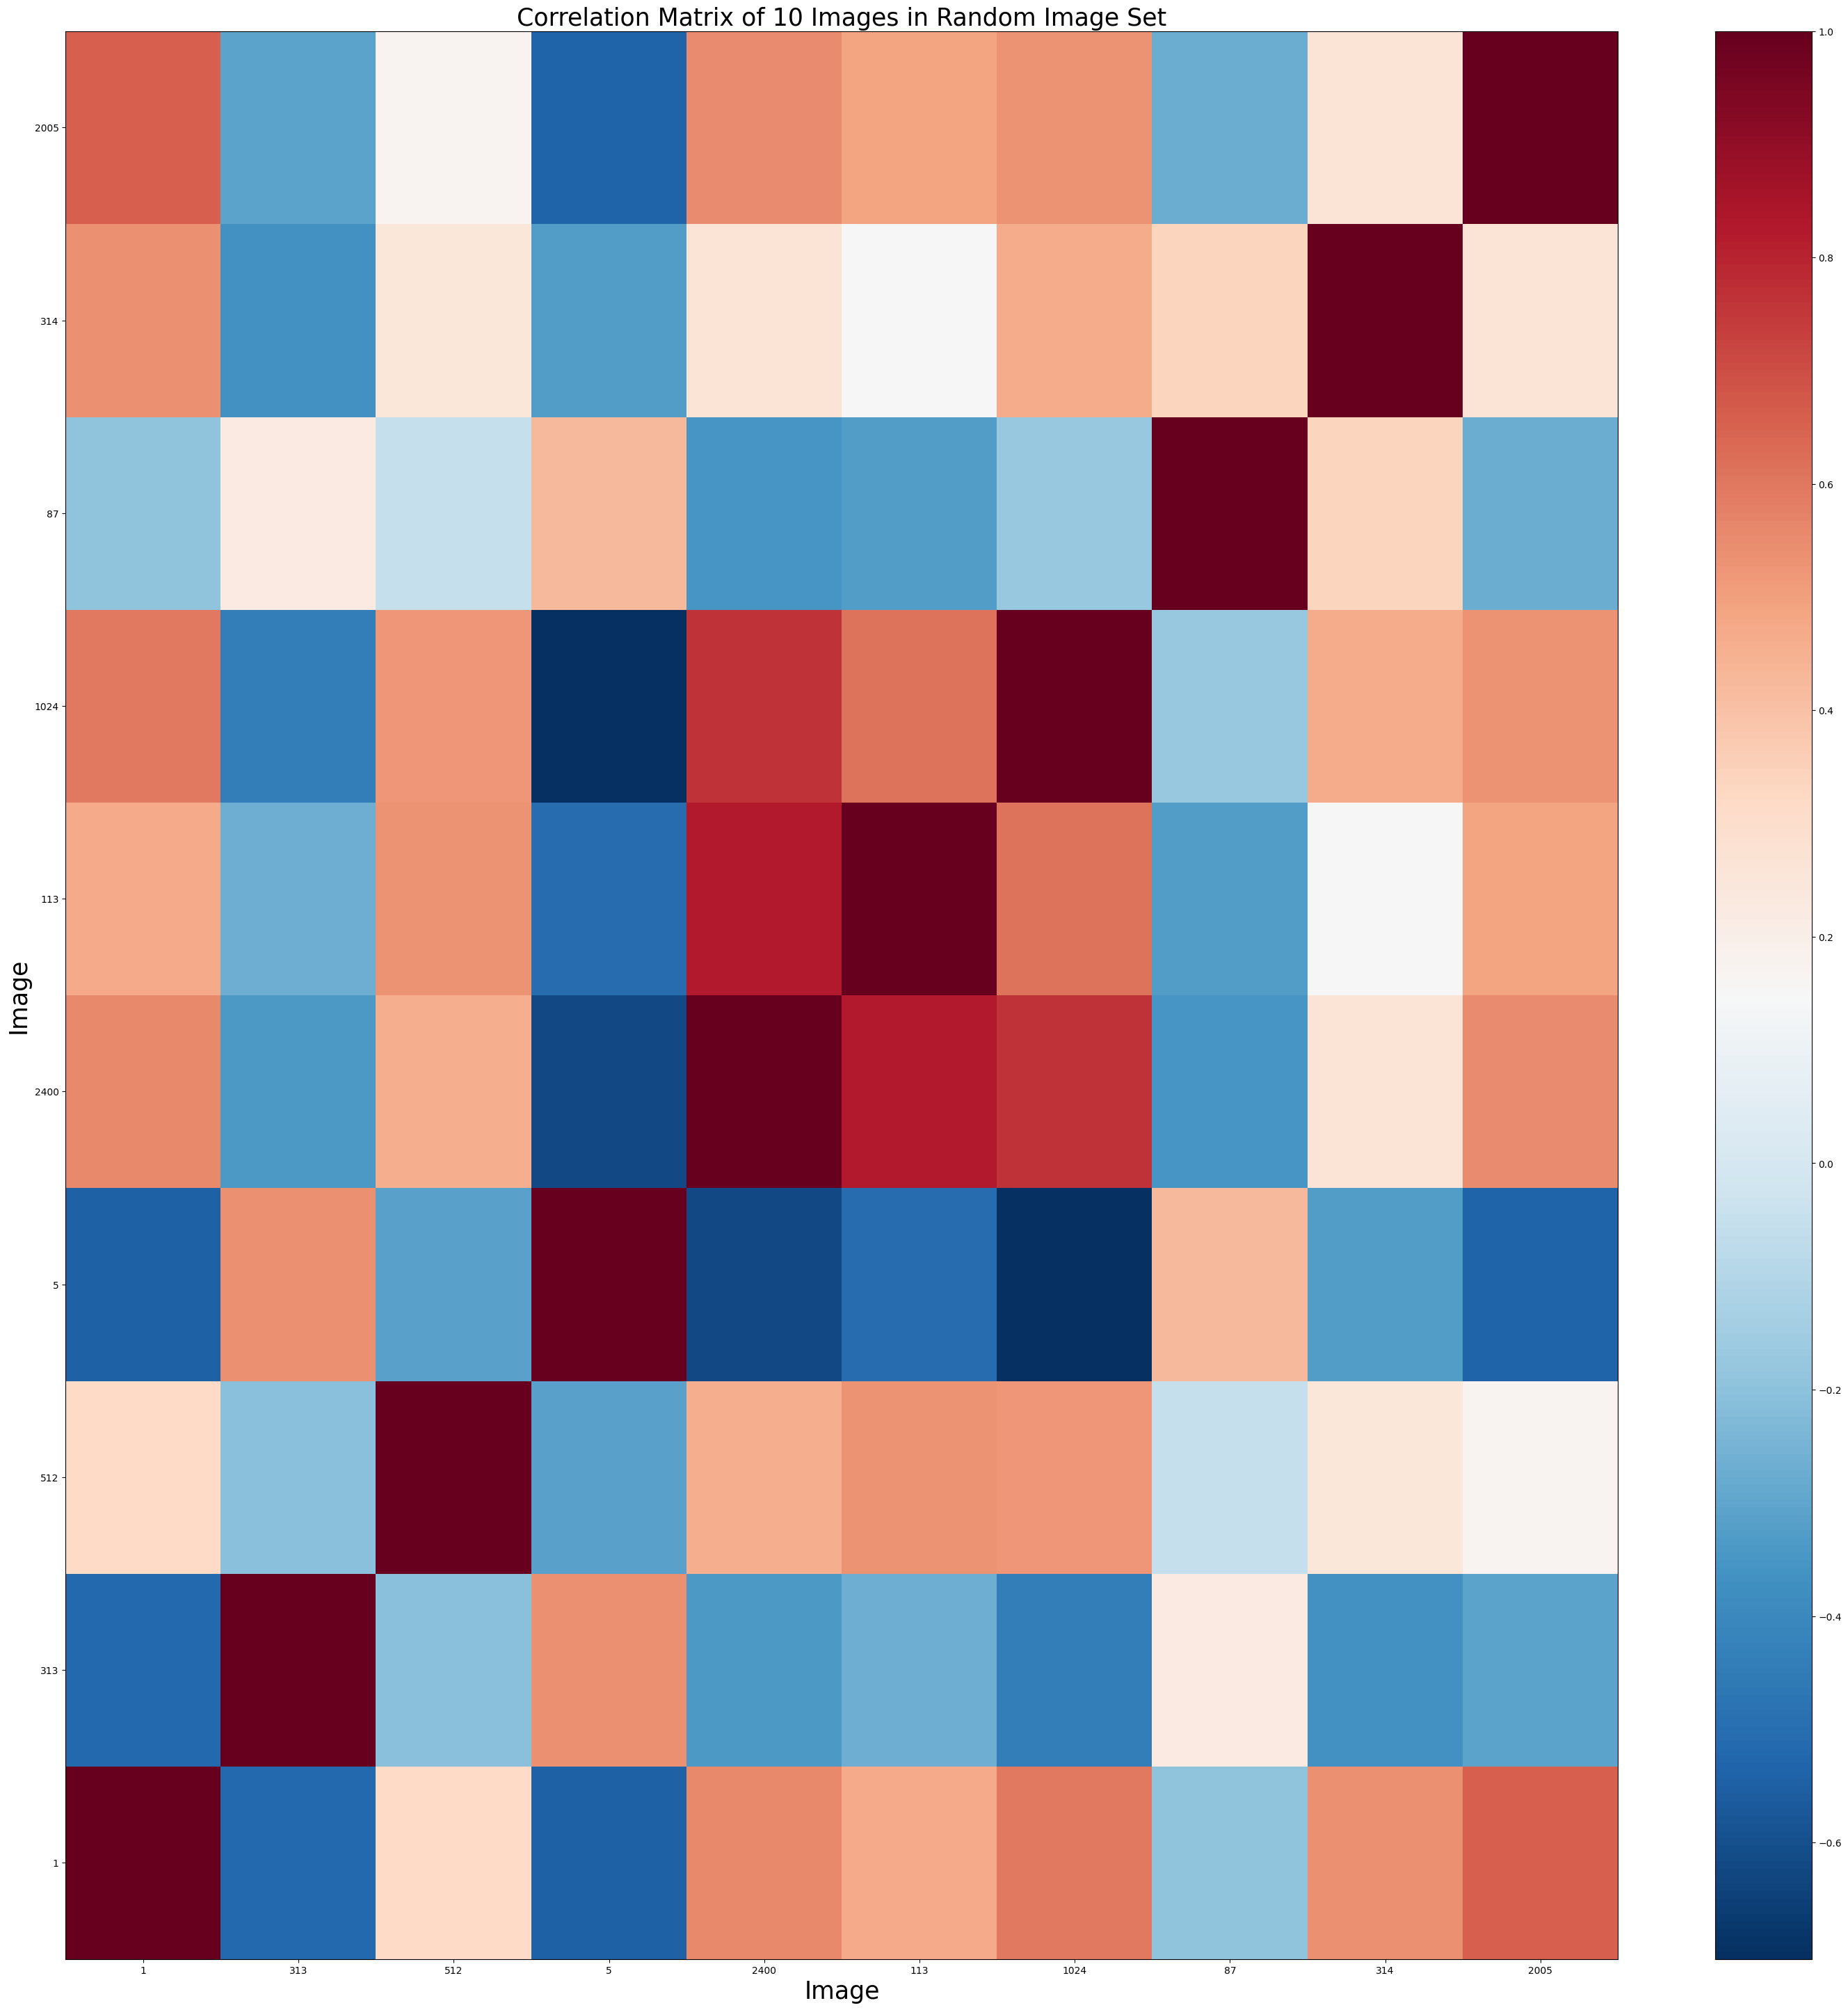

In [157]:
image_set = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
m2 = len(image_set)
Xc = np.zeros((X.shape[0], m2))
for i, image in enumerate(image_set):
  Xc[:, i] = X[:, image - 1]

C2 = np.corrcoef(Xc.T)

fig, ax = plt.subplots(figsize=(36, 36))
im = ax.pcolor(C2, cmap='RdBu_r')
ax.set_xticks(np.arange(m2)+0.5, minor=False)
ax.set_yticks(np.arange(m2)+0.5, minor=False)
ax.set_xticklabels([image_set[i] for i in range(m2)], minor=False)
ax.set_yticklabels([image_set[i] for i in range(m2)], minor=False)
plt.xlabel('Image', fontsize=25)
plt.ylabel('Image', fontsize=25)
plt.title(f'Correlation Matrix of {m2} Images in Random Image Set', fontsize=25)
plt.colorbar(im)
plt.show()


Max Correlation: 0.8223882923346127
Most highly correlated pair: 2400 and 113

Min Correlation: -0.7029530043859094
Most highly uncorrelated pair: 5 and 1024


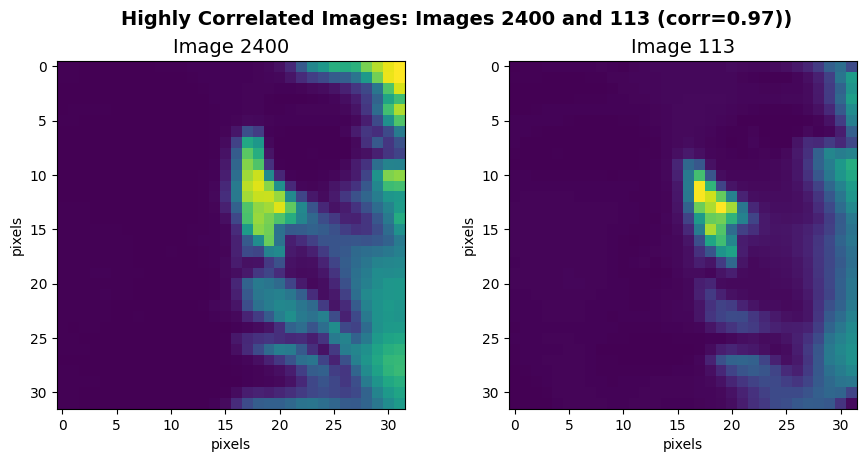

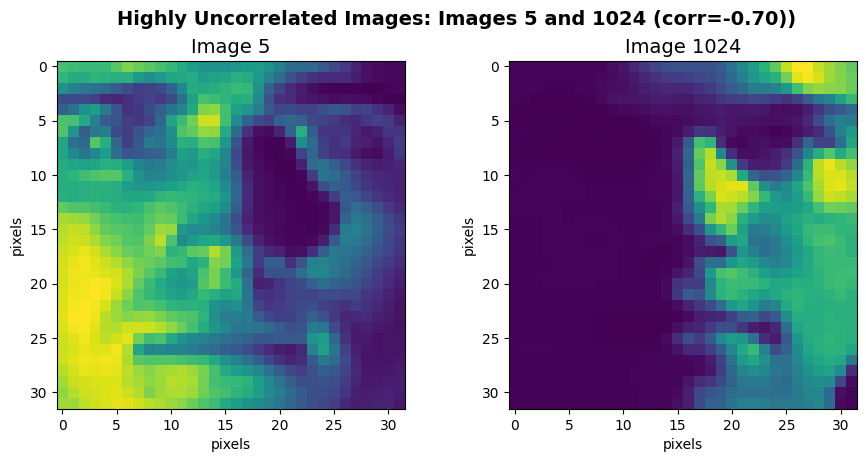

In [147]:
max_corr2 = np.max((C2 - np.eye(m2)))
print('Max Correlation:', max_corr2)
max_indices2 = np.where((C2 - np.eye(m2)) == max_corr2)
print("Most highly correlated pair:", image_set[max_indices2[0][0]], "and", image_set[max_indices2[1][0]])
print()

min_corr = np.min((C2 - np.eye(m2)))
print('Min Correlation:', min_corr)
min_indices2 = np.where((C2 - np.eye(m2)) == min_corr)
print("Most highly uncorrelated pair:", image_set[min_indices2[0][0]], "and", image_set[min_indices2[1][0]])

# First figure
fig1 = plt.figure(figsize=(10, 10))
fig1.suptitle(f'Highly Correlated Images: Images {image_set[max_indices2[0][0]]} and {image_set[max_indices2[1][0]]} (corr={max_corr:.2f}))', fontsize=14, fontweight='bold', y=0.7)

ax1 = fig1.add_subplot(1, 2, 1)
ax1.imshow(X[:, image_set[max_indices2[0][0]] - 1].reshape((32, 32), order='F').T)
ax1.set_title(f'Image {image_set[max_indices2[0][0]]}', fontsize=14)
ax1.set_xlabel('pixels')
ax1.set_ylabel('pixels')

ax2 = fig1.add_subplot(1, 2, 2)
ax2.imshow(X[:, image_set[max_indices2[0][1]] - 1].reshape((32, 32), order='F').T)
ax2.set_title(f'Image {image_set[max_indices2[0][1]]}', fontsize=14)
ax2.set_xlabel('pixels')
ax2.set_ylabel('pixels')

fig1.subplots_adjust(wspace=0.3, hspace=0.3, top=0.85, bottom=0.1, left=0.1, right=0.9)

# Second figure
fig2 = plt.figure(figsize=(10, 10))
fig2.suptitle(f'Highly Uncorrelated Images: Images {image_set[min_indices2[0][0]]} and {image_set[min_indices2[1][0]]} (corr={min_corr:.2f}))', fontsize=14, fontweight='bold', y=0.7)

ax3 = fig2.add_subplot(1, 2, 1)
ax3.imshow(X[:, image_set[min_indices2[0][0]] - 1].reshape((32, 32), order='F').T)
ax3.set_title(f'Image {image_set[min_indices2[0][0]]}', fontsize=14)
ax3.set_xlabel('pixels')
ax3.set_ylabel('pixels')

ax4 = fig2.add_subplot(1, 2, 2)
ax4.imshow(X[:, image_set[min_indices2[1][0]] - 1].reshape((32, 32), order='F').T)
ax4.set_title(f'Image {image_set[min_indices2[1][0]]}', fontsize=14)
ax4.set_xlabel('pixels')
ax4.set_ylabel('pixels')

fig2.subplots_adjust(wspace=0.3, hspace=0.3, top=0.85, bottom=0.1, left=0.1, right=0.9)

plt.show()

In [161]:
# Calculate Y
Y = np.matmul(X,X.T)

# Find the eigenvalues and eigenvectors of Y
eigvals, eigvecs = np.linalg.eigh(Y)

# Sort in descending order by largest magnitude eigenvalue
idx = eigvals.argsort()[::-1]   
eigVals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:,idx]

# Grab the first six eigenvectors with largest magnitude eigenvalue
top_six_eigvecs = eigvecs[:, :6]
print('Top 6 eigenvectors:\n', top_six_eigvecs)
print()
print('Top 6 eigenvectors matrix shape:', top_six_eigvecs.shape)

Top 6 eigenvectors:
 [[-4.10237887e-04  1.58859873e-03 -2.38076702e-03 -2.45339156e-03
  -2.62221705e-03 -1.27829277e-03]
 [ 4.78109907e-03 -8.86966553e-03  2.65168331e-03 -5.37318701e-03
   9.31985847e-03 -1.27356522e-05]
 [-6.78472012e-03  7.06008954e-03 -7.30765140e-04  3.87684913e-03
  -7.99903719e-03 -1.75989838e-03]
 ...
 [-3.29010006e-03 -5.96037134e-03 -4.76829798e-03  1.19277022e-02
   7.47630468e-03 -1.40744989e-02]
 [-1.31794903e-03 -1.75508265e-03 -1.73227691e-03 -7.67184505e-03
   5.23320374e-04  1.43745595e-03]
 [ 1.68849094e-03  2.66652779e-03  4.58061531e-03  1.48462216e-03
  -3.27738853e-04  3.20845465e-03]]

Top 6 eigenvectors matrix shape: (1024, 6)


In [166]:
# SVD decomposition of matrix X
U, S, Vt = np.linalg.svd(X)

# First six principal component directions
PC_directions = U[:, :6]
print('First 6 PC Directions:\n', PC_directions)
print()
print('First 6 PC Directions matrix shape:', PC_directions.shape)

# # Plot the first six principal component directions as vectors
# fig, ax = plt.subplots(figsize=(8,8))
# ax.set_aspect('equal')
# ax.arrow(0, 0, PC_directions[0,0], PC_directions[1,0], head_width=0.02, head_length=0.02, fc='r', ec='r', label='PC1')
# ax.arrow(0, 0, PC_directions[0,1], PC_directions[1,1], head_width=0.02, head_length=0.02, fc='g', ec='g', label='PC2')
# ax.arrow(0, 0, PC_directions[0,2], PC_directions[1,2], head_width=0.02, head_length=0.02, fc='b', ec='b', label='PC3')
# ax.arrow(0, 0, PC_directions[0,3], PC_directions[1,3], head_width=0.02, head_length=0.02, fc='c', ec='c', label='PC4')
# ax.arrow(0, 0, PC_directions[0,4], PC_directions[1,4], head_width=0.02, head_length=0.02, fc='m', ec='m', label='PC5')
# ax.arrow(0, 0, PC_directions[0,5], PC_directions[1,5], head_width=0.02, head_length=0.02, fc='y', ec='y', label='PC6')
# ax.set_xlim([-0.15, 0.15])
# ax.set_ylim([-0.15, 0.15])
# ax.set_xlabel('Feature 1', fontsize=16)
# ax.set_ylabel('Feature 2', fontsize=16)
# ax.legend(frameon=False, fontsize=14, loc='upper right')
# ax.set_title('First Six Principal Component Directions', fontsize=18)
# plt.show()

First 6 PC Directions:
 [[-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146 -0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448 -0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937  0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902   0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019   0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]

First 6 PC Directions matrix shape: (1024, 6)


In [169]:
v1 = top_six_eigvecs[0]
u1 = PC_directions[0, :]
print('First eigenvector v1 from Y:', v1)
print('First SVD mode u1 from X:', u1)

# Compute norm of difference of absolute values
diff_norm = np.linalg.norm(np.abs(v1) - np.abs(u1))

print()
print("Norm of difference:", diff_norm)

First eigenvector v1 from Y: [-0.00041024  0.0015886  -0.00238077 -0.00245339 -0.00262222 -0.00127829]
First SVD mode u1 from X: [-0.02384327 -0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]

Norm of difference: 0.09252892997923706


Percentage of variance captured by the first 6 SVD modes:
SVD mode 1: 72.93%
SVD mode 2: 15.28%
SVD mode 3: 2.57%
SVD mode 4: 1.88%
SVD mode 5: 0.64%
SVD mode 6: 0.59%




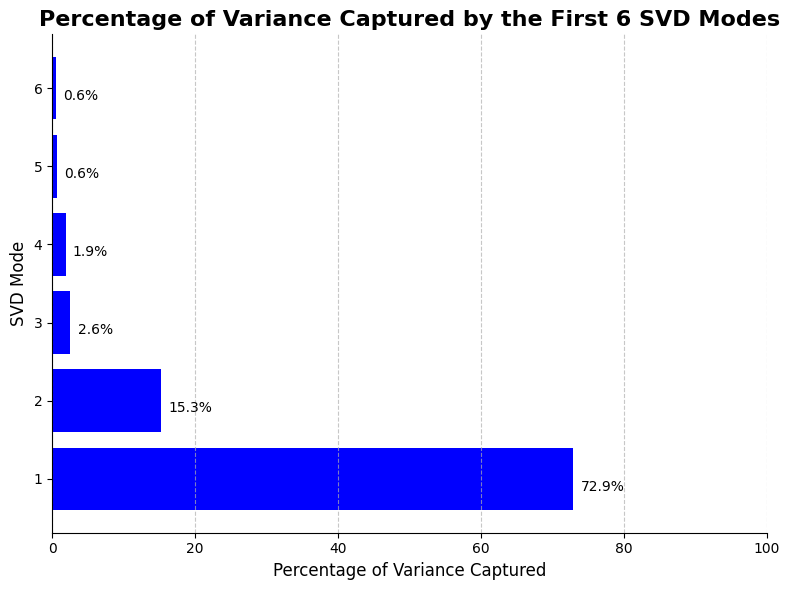

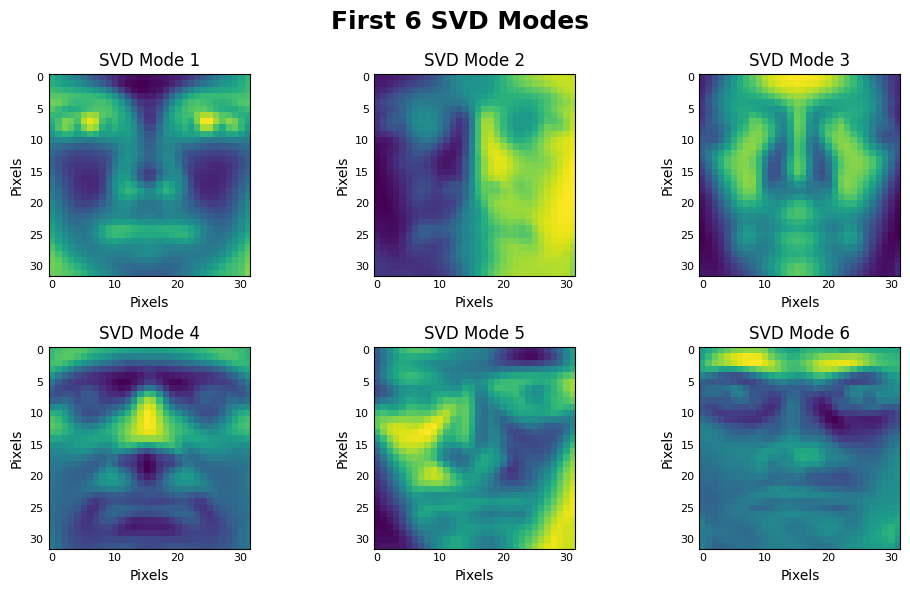

In [133]:
# Compute the total variance of the data
total_var = np.sum(S ** 2)

# Compute the percentage of variance captured by each of the first 6 SVD modes
variance_percentage = [(S[i] ** 2 / total_var) * 100 for i in range(6)]

print('Percentage of variance captured by the first 6 SVD modes:')
for i, vp in enumerate(variance_percentage):
    print(f'SVD mode {i+1}: {vp:.2f}%')

print()
print()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as a horizontal bar chart with blue bars
ax.barh(range(1, 7), variance_percentage, color='blue')

# Add a grid and remove the top and right spines
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set plot title and labels
ax.set_title('Percentage of Variance Captured by the First 6 SVD Modes', fontsize=16, fontweight='bold')
ax.set_xlabel('Percentage of Variance Captured', fontsize=12)
ax.set_ylabel('SVD Mode', fontsize=12)

# Set x-axis tick labels to integers and increase font size
ax.set_xticks(range(0, 101, 20))
ax.set_xticklabels(range(0, 101, 20), fontsize=10)

# Set y-axis tick labels to integers and increase font size
ax.set_yticks(range(1, 7))
ax.set_yticklabels(range(1, 7), fontsize=10)

# Add percentages to the end of each bar
for i, v in enumerate(variance_percentage):
    ax.text(v + 1, i + 1 - 0.15, f'{v:.1f}%', fontsize=10)

# Tighten the layout and save the figure
fig.tight_layout()
fig.savefig('variance_plot.png', dpi=300)

# Show the plot
plt.show()

print()
print()

# Plot the first 6 SVD modes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Iterate over the first 6 SVD modes
for i in range(6):
    r, c = divmod(i, 3)
    ax = axs[r, c]
    
    # Plot the mode as an image
    im = ax.imshow(U[:, i].reshape((32, 32)))
    
    # Add title and turn off tick labels
    ax.set_title(f'SVD Mode {i+1}')
    ax.tick_params(axis='both', labelsize=8, length=0)
    
    # Add x and y labels with ticks
    ax.set_xlabel('Pixels', fontsize=10)
    ax.set_ylabel('Pixels', fontsize=10)
    plt.setp(ax.get_xticklabels(), fontsize=8)
    plt.setp(ax.get_yticklabels(), fontsize=8)

fig.suptitle('First 6 SVD Modes', fontsize=18, fontweight='bold')
fig.tight_layout()
plt.show()
